In [1]:
import os
import pickle
from tqdm import tqdm

import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
    

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import balanced_accuracy_score, precision_score, roc_auc_score, f1_score, RocCurveDisplay
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
%%time

DATA_DIR = "../project_dataset"
VALID_DIR = f"{DATA_DIR}/partial_dataset_valid"

X = pd.read_csv(f"{VALID_DIR}/features.csv", index_col=0)
y = pd.read_csv(f"{VALID_DIR}/labels.csv", index_col=0)

X = X.values
y = LabelEncoder().fit_transform(y.values.squeeze())

CPU times: total: 1min 58s
Wall time: 2min


In [3]:
X.shape

(668582, 952)

## Be sure to delete old the model files before running

In [4]:
def get_cf_mat(y_true, y_pred, ax):
    
    print(classification_report(y_true, y_pred))
    cf_mat = confusion_matrix(y_true, y_pred)
    df_cm = pd.DataFrame(cf_mat, index=["False", "True"], columns=["False", "True"])
    
    return sns.heatmap(df_cm, annot=True, ax=ax)

def get_metrics(y_true, y_pred):
    
    return {
        "b_acc": round(balanced_accuracy_score(y_true, y_pred), 2),
        "prec": round(precision_score(y_true, y_pred), 2),
        "f1": round(f1_score(y_true, y_pred), 2),
        "roc": round(roc_auc_score(y_true, y_pred), 2)
    }

def get_roc_curve(model, X, y, title, fig=None):
    if fig:
        return RocCurveDisplay.from_estimator(model, X, y, name=title, ax=fig.ax_)
    return RocCurveDisplay.from_estimator(model, X, y, name=title)

In [5]:
MODEL_DIR = "../models"
# best_model_name = ""
# best_acc = 0
# y_pred_best = None
# for fname in tqdm(os.listdir(MODEL_DIR)):
#     if "logistic" in fname.lower() and fname.endswith("pkl"):
        
#         model = pickle.load(open(f"{MODEL_DIR}/{fname}", 'rb'))
#         y_pred = model.predict(X)
#         d = get_metrics(y, y_pred)
        
#         if best_acc < d["roc"]:
#             best_acc = d["roc"]
#             best_model_name = fname
#             best_y_pred = y_pred
        
# best_model_name, best_acc

In [6]:
model = pickle.load(open(f"../models/OneSidedSelection_best_model_250000_LogisticRegression_0.7_0.76.pkl", 'rb'))

In [7]:
model

Pipeline(steps=[('scaler', PowerTransformer()),
                ('dim_reduce', PCA(n_components=20)),
                ('clf',
                 LogisticRegression(C=0.18, class_weight='balanced',
                                    max_iter=1500, solver='saga'))])

In [8]:
# fig = None
# fig, _ = plot_roc(model1, X, y, "", fig)
# fig, _ = plot_roc(model2, X, y, "", fig)
# plt.show()
y_pred = model.predict(X)
# y_pred2 = model2.predict(X)
d = get_metrics(y, y_pred)
# d2 = get_metrics(y, y_pred2)
# d1["roc"], d2["roc"]
d

{'b_acc': 0.72, 'prec': 0.05, 'f1': 0.09, 'roc': 0.72}

              precision    recall  f1-score   support

           0       0.99      0.68      0.81    654691
           1       0.05      0.77      0.09     13891

    accuracy                           0.68    668582
   macro avg       0.52      0.72      0.45    668582
weighted avg       0.97      0.68      0.79    668582



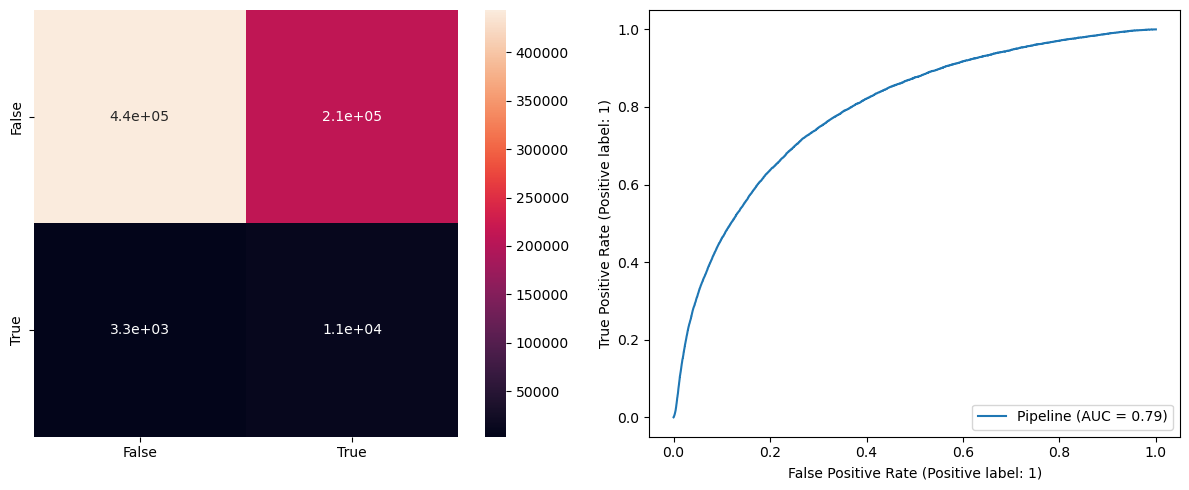

In [9]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
ax[0] = get_cf_mat(y, y_pred, ax[0])
ax[1] = RocCurveDisplay.from_estimator(model, X, y, ax=ax[1])
plt.tight_layout()
plt.savefig("../images/validation_res_250k.png")
plt.show()